In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [6]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [7]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
df = df.drop('income', axis=1)
df.head()

,region,tenure,age,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,4,5,0.0,0,2,1
1,3,11,33,1,7,5,5,0.0,0,6,4
2,3,68,52,1,24,1,29,0.0,1,2,3
3,2,33,33,0,12,2,0,0.0,1,1,1
4,2,23,30,1,9,1,2,0.0,0,4,3


In [9]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [10]:
df = df.rename(columns={"custcat" : "customer_group"})
df.dtypes

region              int64
tenure              int64
age                 int64
marital             int64
address             int64
ed                  int64
employ              int64
retire            float64
gender              int64
reside              int64
customer_group      int64
dtype: object

In [11]:
df['customer_group'].value_counts().sort_index()

customer_group
1    266
2    217
3    281
4    236
Name: count, dtype: int64

In [12]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside']].values
y = df['customer_group'].values
X

array([[ 2., 13., 44., ...,  0.,  0.,  2.],
       [ 3., 11., 33., ...,  0.,  0.,  6.],
       [ 3., 68., 52., ...,  0.,  1.,  2.],
       ...,
       [ 3., 67., 59., ...,  0.,  1.,  1.],
       [ 3., 70., 49., ...,  0.,  1.,  1.],
       [ 3., 50., 36., ...,  0.,  1.,  3.]], shape=(1000, 10))

In [13]:
y

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2, 1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 2, 1,
       4, 1, 3, 3, 4, 3, 1, 2, 2, 4, 3, 2, 4, 2, 4, 3, 3, 3, 3, 3, 1, 4,
       3, 2, 2, 4, 1, 3, 1, 2, 4, 1, 1, 1, 2, 1, 3, 2, 3, 4, 1, 4, 4, 1,
       3, 3, 1, 1, 1, 2, 1, 2, 3, 1, 3, 1, 3, 4, 4, 1, 4, 3, 2, 1, 2, 4,
       4, 3, 2, 1, 2, 4, 1, 4, 3, 2, 3, 2, 4, 3, 3, 2, 2, 2, 1, 4, 1, 2,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 1, 1, 1, 1, 2, 1, 2, 4, 2, 2, 4, 3, 1,
       4, 2, 3, 1, 1, 3, 3, 4, 4, 3, 4, 2, 3, 1, 4, 2, 2, 2, 1, 3, 4, 4,
       4, 3, 1, 1, 2, 3, 3, 3, 1, 3, 2, 2, 4, 1, 1, 2, 4, 1, 4, 1, 2, 1,
       3, 4, 4, 1, 4, 1, 2, 2, 2, 1, 1, 2, 3, 3, 1, 4, 2, 3, 4, 1, 1, 3,
       1, 4, 1, 4, 2, 2, 4, 1, 3, 4, 3, 3, 1, 1, 1, 2, 2, 1, 3, 4, 4, 1,
       3, 4, 1, 3, 1, 4, 4, 1, 3, 3, 3, 3, 2, 1, 4, 2, 4, 4, 1, 4, 1, 4,
       3, 2, 1, 3, 2, 1, 1, 2, 1, 4, 2, 2, 4, 3, 2, 1, 4, 4, 4, 1, 3, 2,
       1, 1, 3, 3, 3, 1, 3, 2, 4, 1, 3, 2, 2, 3, 3, 1, 4, 4, 3, 2, 3, 3,
       4, 3, 3, 2, 4, 3, 2, 3, 4, 4, 3, 1, 4, 2, 3,

In [14]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]], shape=(1000, 10))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

In [17]:
y_pred = model.predict(X_test)
y_pred

array([4, 2, 3, 2, 3, 3, 4, 3, 1, 4, 2, 3, 4, 1, 1, 2, 4, 4, 1, 1, 1, 1,
       1, 3, 3, 3, 2, 4, 4, 2, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 3, 3, 3, 3,
       1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       4, 1, 3, 1, 3, 4, 3, 1, 2, 1, 3, 3, 3, 1, 1, 1, 2, 2, 1, 3, 1, 4,
       2, 2, 4, 3, 2, 3, 3, 2, 2, 1, 4, 1, 2, 3, 1, 2, 1, 1, 1, 3, 1, 3,
       4, 1, 1, 1, 3, 2, 3, 3, 3, 4, 3, 3, 3, 3, 4, 2, 3, 3, 1, 2, 1, 2,
       1, 1, 1, 4, 3, 2, 1, 1, 2, 1, 1, 4, 1, 4, 2, 3, 4, 3, 1, 4, 4, 3,
       3, 1, 2, 3, 2, 1, 4, 1, 2, 1, 1, 1, 2, 2, 1, 4, 1, 3, 4, 4, 3, 4,
       1, 1, 1, 1, 2, 3, 4, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 4, 1, 1, 1, 1,
       2, 3])

Accuracy: 35.0 %

Classification Report:
               precision    recall  f1-score   support

           1       0.38      0.52      0.44        60
           2       0.19      0.18      0.19        39
           3       0.36      0.33      0.34        55
           4       0.44      0.30      0.36        46

    accuracy                           0.35       200
   macro avg       0.34      0.33      0.33       200
weighted avg       0.35      0.35      0.34       200
 



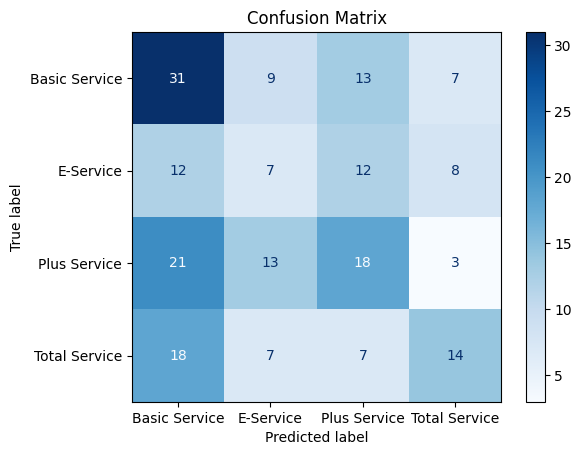

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred) * 100
c_report = classification_report(y_test, y_pred)
c_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy} %\n")
print(f"Classification Report:\n {c_report} \n")
display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=["Basic Service", "E-Service", "Plus Service", "Total Service"])
display.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

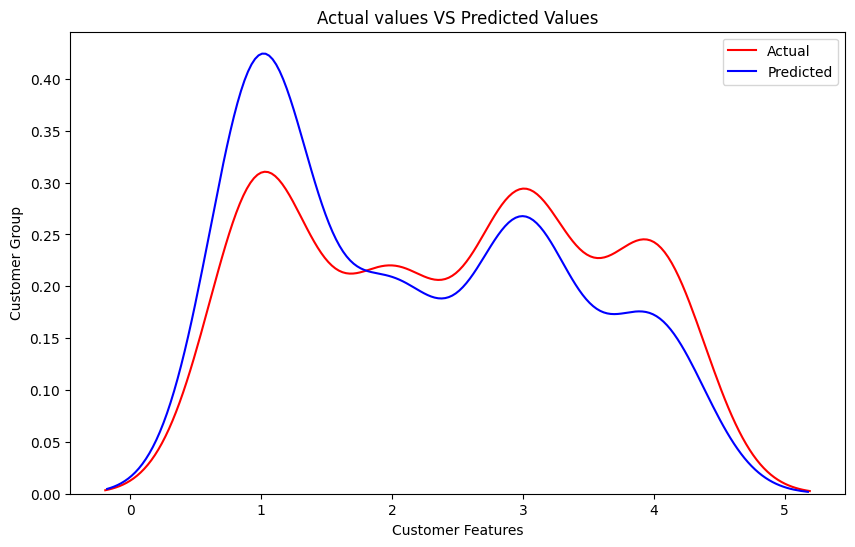

In [20]:
import seaborn as sns
plt.figure(figsize=(10, 6))  # width=12, height=6
sns.kdeplot(y_test, color="red", label="Actual", fill=False)
sns.kdeplot(y_pred, color="blue", label="Predicted", fill=False)
plt.title("Actual values VS Predicted Values")
plt.xlabel("Customer Features")
plt.ylabel("Customer Group")
plt.legend()
plt.show()

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
